# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent of the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# Remove and set limit for the number of displayed columns and rows, respectively
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [2]:
#loading the dataset
data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Ensemble Techniques\Project 5\EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# Viewing first five rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# Viewing last five rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [5]:
# Getting the number of rows and columns
data.shape

(25480, 12)

In [6]:
# Looking at the column data types and counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
# Changing object into category
for i in cols.columns:
    data[i] = data[i].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [9]:
# Getting the statistical summary
pd.set_option('display.float_format', lambda x: '%.1f' %x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.0,22877.9,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,1979.4,42.4,1800.0,1976.0,1997.0,2005.0,2016.0
prevailing_wage,25480.0,74455.8,52815.9,2.1,34015.5,70308.2,107735.5,319210.3


In [10]:
# Fixing negative values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

In [11]:
# Summary of categorical data
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [12]:
# Looking at the unique values of all the categories
cat_cols = data.describe(include=["category"]).columns
for i in cat_cols:
    print("Unique values in", i, "are:")
    print(data[i].value_counts())
    print("_"*50)

Unique values in case_id are:
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
__________________________________________________
Unique values in continent are:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
__________________________________________________
Unique values in education_of_employee are:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
__________________________________________________
Unique values in has_job_experience are:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
__________________________________________________
Unique values in requires_job_training are:
N    22525
Y     2955
Name: requires_job_t

In [13]:
# Checking for unique values in the case ID column
data["case_id"].nunique()

25480

In [14]:
# Dropping unnecessary columns
data.drop(["case_id"],axis=1,inplace=True)

In [15]:
# Checking for duplicate values
data.duplicated().sum()

0

In [16]:
# Checking for null values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [17]:
# Copying original dataset
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Univariate Analysis**

In [18]:
# Function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color = "thistle") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  color = "thistle")
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [19]:
# Function to create a labeled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")
    plt.show()

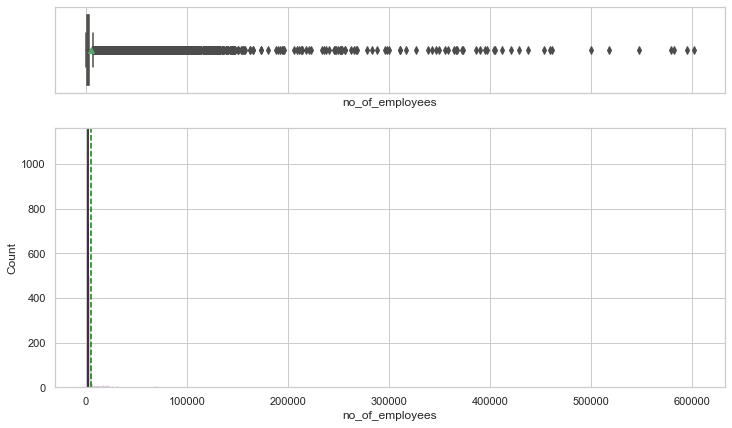

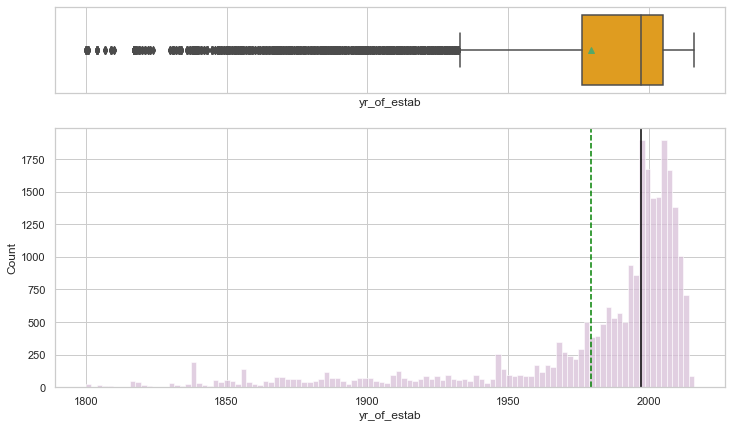

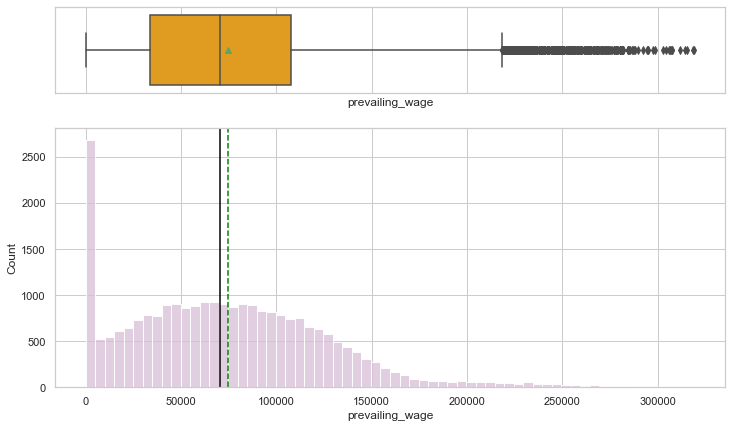

In [20]:
# Plotting numerical data
num_cols = df.describe(include=["int64", "float64"])
for col in num_cols:
    histogram_boxplot(df, col)

In [21]:
df.loc[data["prevailing_wage"] == 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [22]:
df.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

- No rows have values of '0' for prevailing wage
- All low values shown in histogram-boxplot for prevailing wage fall under the 'Hour' unit wage type

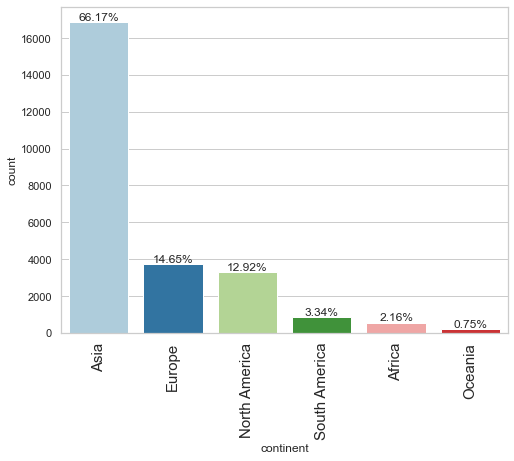

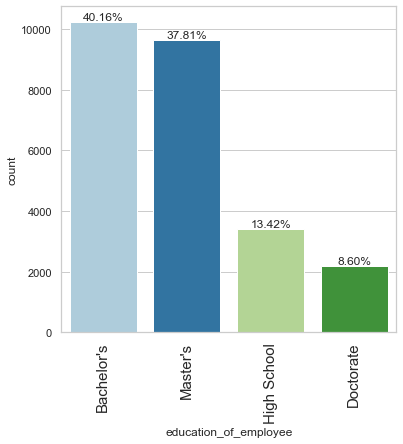

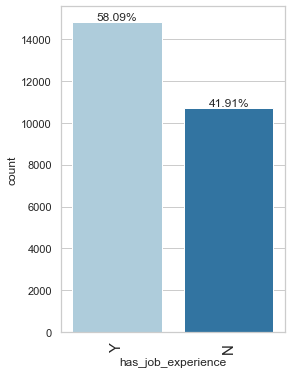

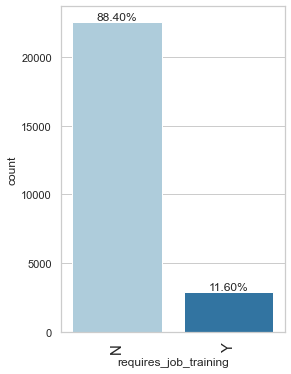

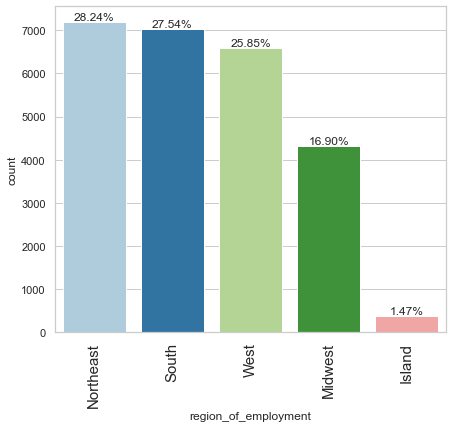

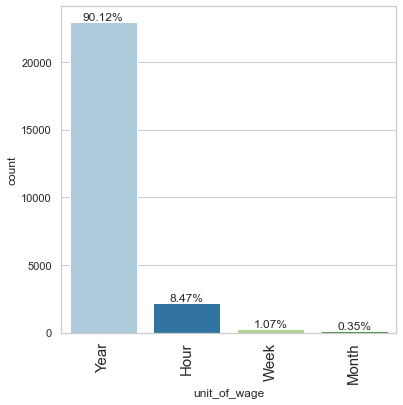

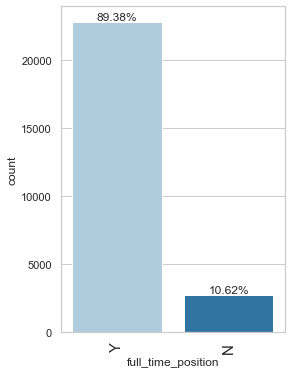

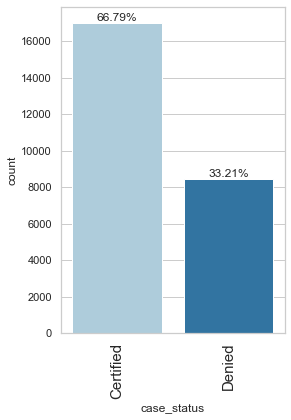

In [23]:
# Plotting categorical data
cat_columns = df.describe(include=["category"]).columns
for col in cat_columns:
    labeled_barplot(df, col, perc=True)

**Bivariate Analysis**

In [24]:
# Function to create a stacked bar chart
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
# Function to plot distributions with respect to target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [26]:
df.describe(include=["category"]).columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


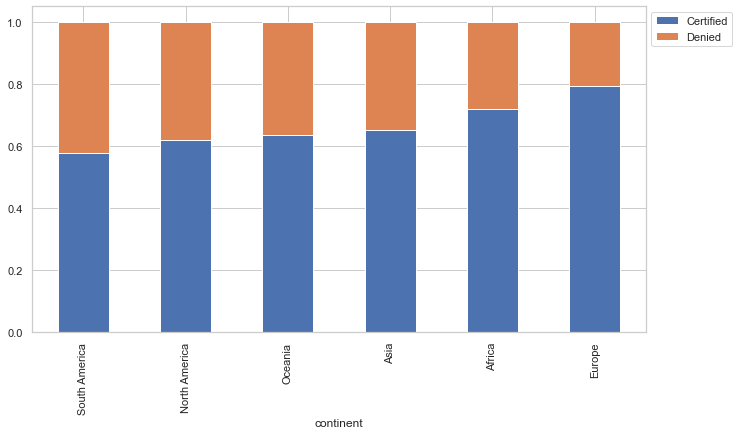

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


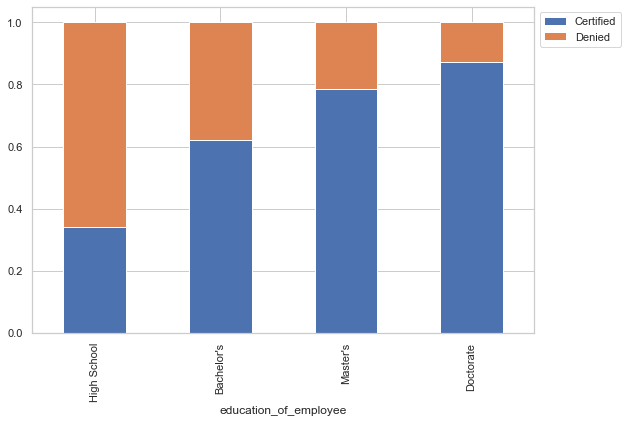

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


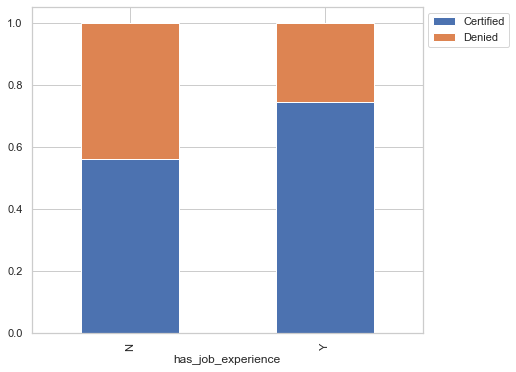

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


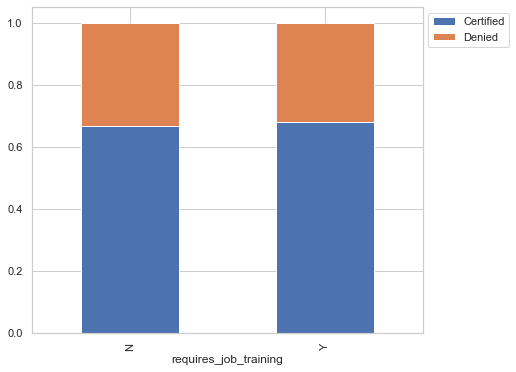

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


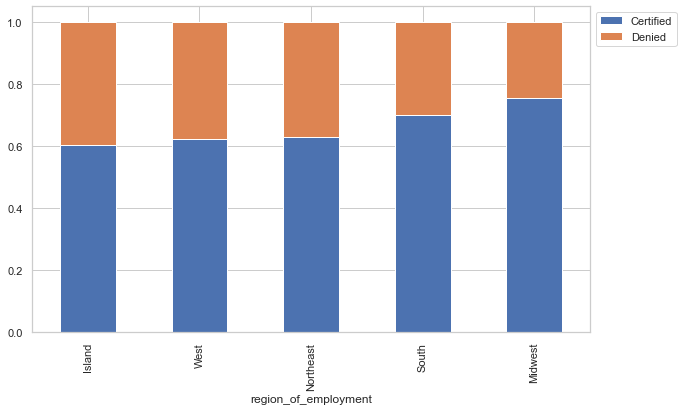

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


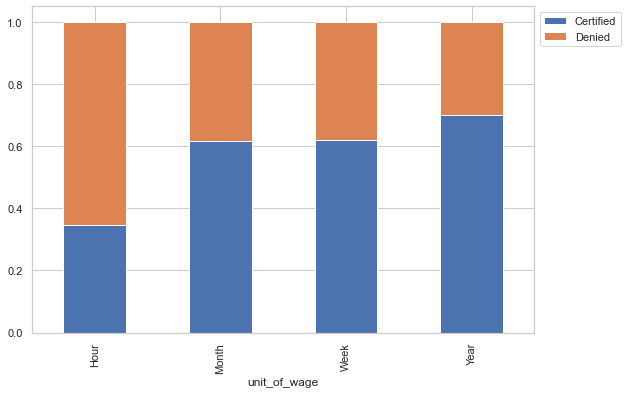

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


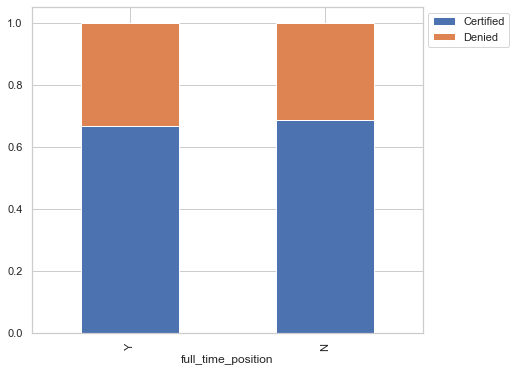

In [27]:
# Plotting barplots
columns = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position']
for col in columns:
    stacked_barplot(df, col, "case_status")

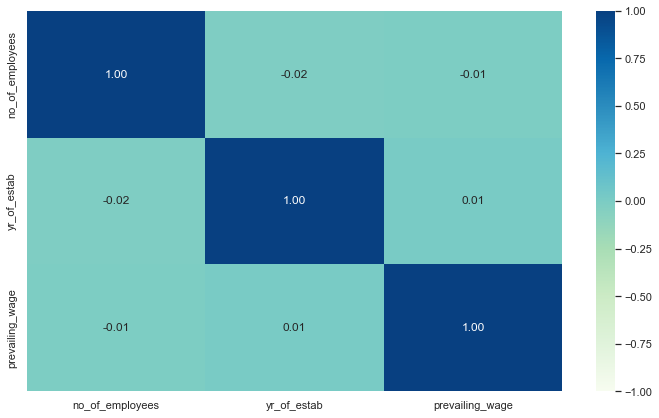

In [28]:
# Plotting correlation heatmap
cols_list = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
plt.show()

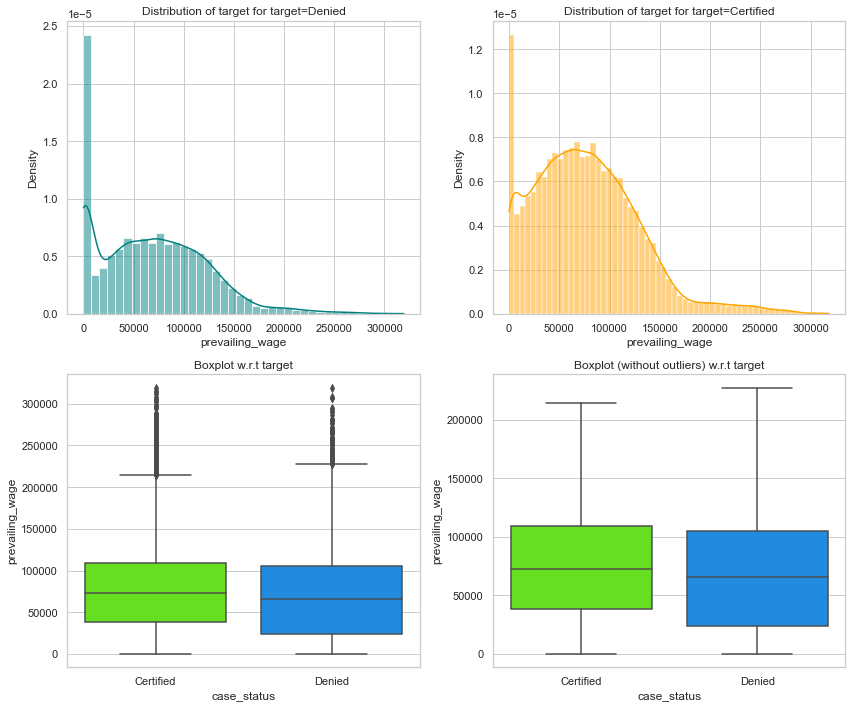

In [29]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

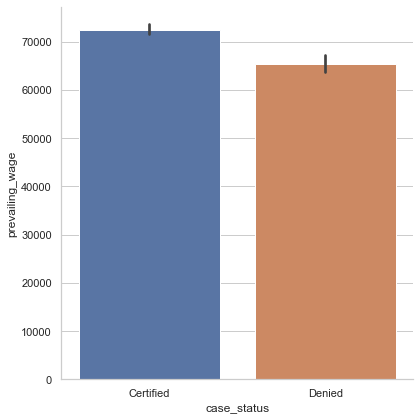

In [30]:
sns.catplot(x="case_status", y="prevailing_wage", data=df, kind='bar', height=6, estimator=np.median);

**Leading Questions:**
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Answers:**
1. The level of education plays a big role in a Visa being granted. Those with Doctorate's are less likely to be denied a Visa followed by Master's, Bachelor's, and lastly High School level. Having a higher qualification gives you a higher chance of visa certification which makes sense.
2. Visa applications from Europe are accepted the most ~80%, followed by Africa ~70%. South America have ~55% of visas being certified, being the least compared to the other continents.
3. Around 75% of visas get certified for professionals that have previous work experience. In comparison, only 55% of visas get certified of professionals that do not have work experience.
4. Having a yearly pay unit is the most likely to be certified for a visa (~70%). Weekly and monthly pay are both around 60%. Hourly wages are the least likely.
5. The median for prevailing wage (~72k) is slightly higher for visas that are certified, as opposed to a median of ~65k for denied visas.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

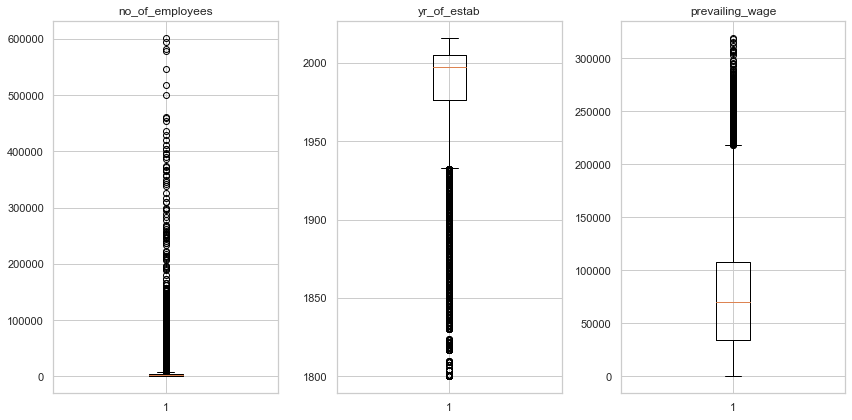

In [31]:
# Outlier detection
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,6))
for i, variable in enumerate(num_cols):
  plt.subplot(1,3,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [32]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 - 1.5 * iqr
100 - ((df[num_cols]<lw)|(df[num_cols]>uw)).sum()/df.shape[0]*100

no_of_employees   0.0
yr_of_estab       5.5
prevailing_wage   0.0
dtype: float64

- There are outliers present, however these will not be treated as they are true values related to the context

**Data Preparation for Modelling**

In [33]:
# Changing the values of case status where Denied = 0 and Certified = 1
data['case_status'] = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

In [34]:
# Defining dependent and independent variables
X = data.drop(['case_status'],axis=1)
y = data['case_status']

# Getting dummies
X = pd.get_dummies(X,drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y) 

In [35]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1   0.7
0   0.3
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.7
0   0.3
Name: case_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


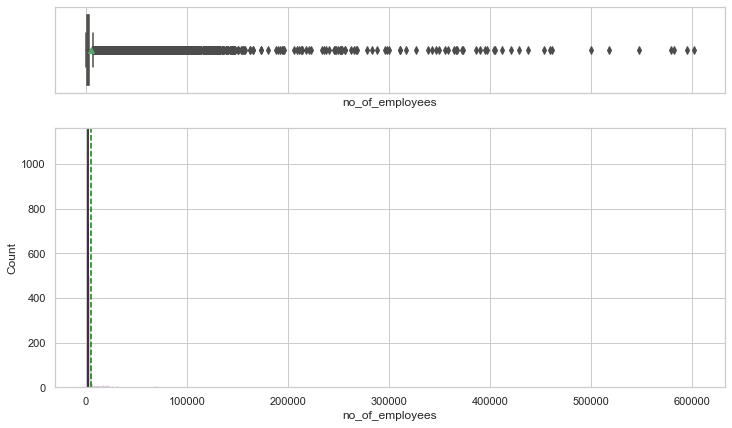

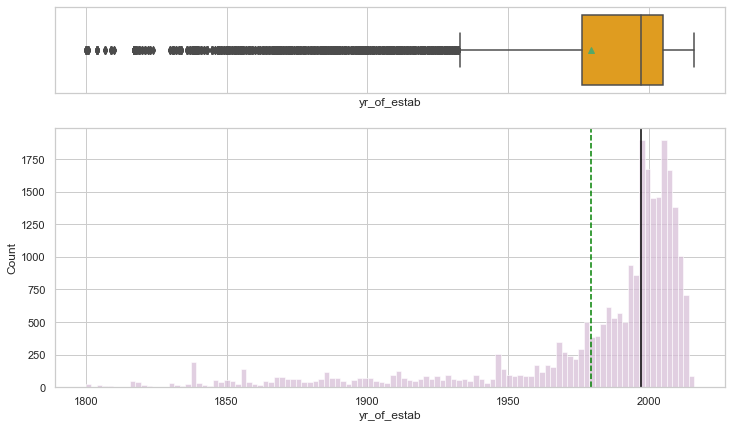

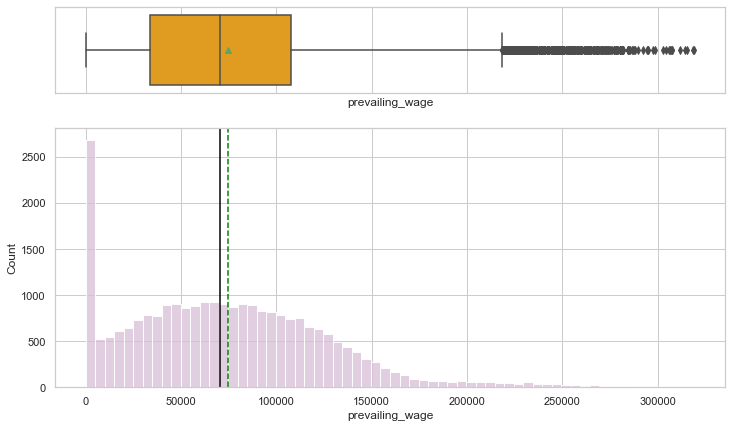

In [37]:
# Plotting numerical data
num_cols = df.describe(include=["int64", "float64"])
for col in num_cols:
    histogram_boxplot(df, col)

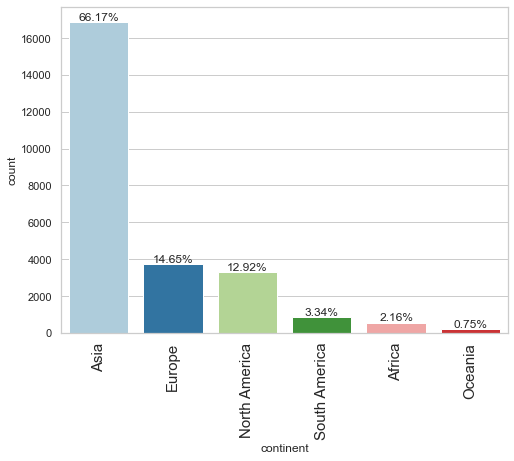

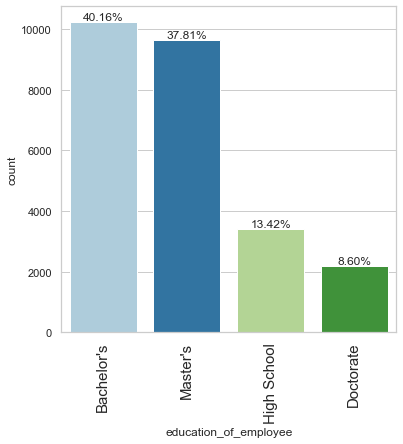

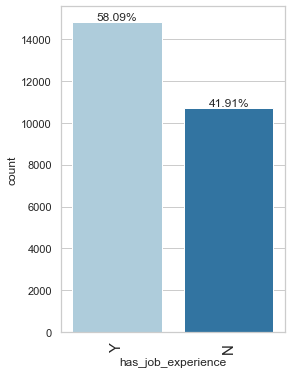

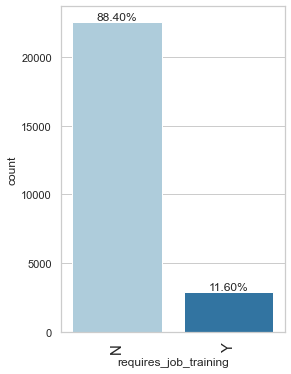

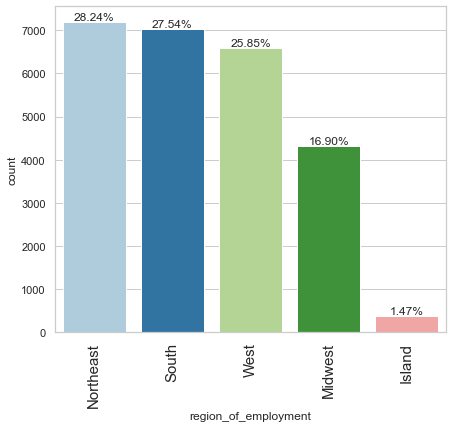

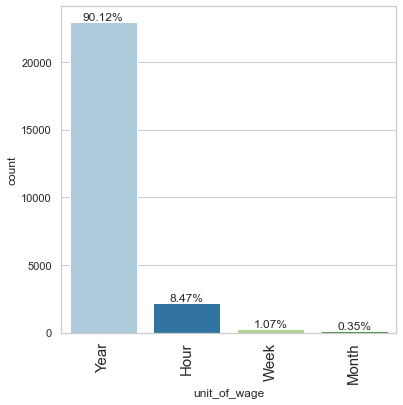

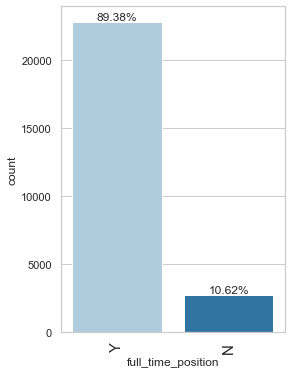

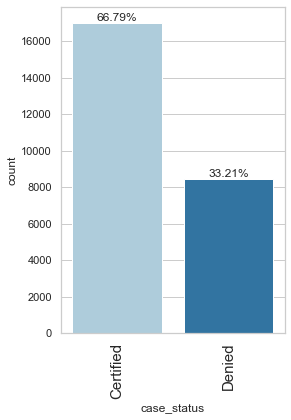

In [38]:
# Plotting categorical data
cat_columns = df.describe(include=['category']).columns
for col in cat_columns:
    labeled_barplot(df, col, perc=True)

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


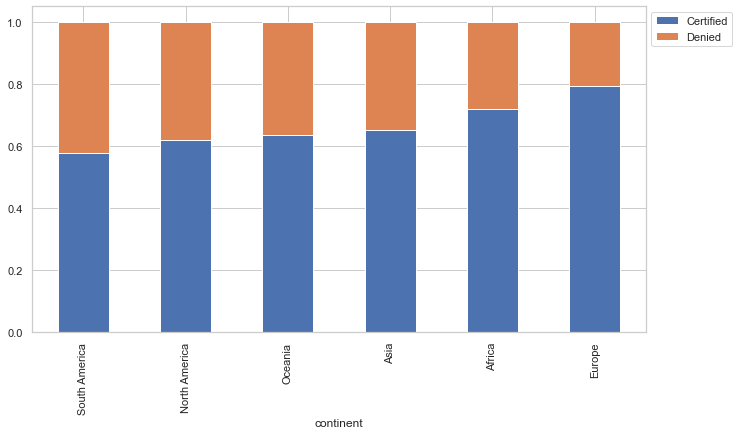

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


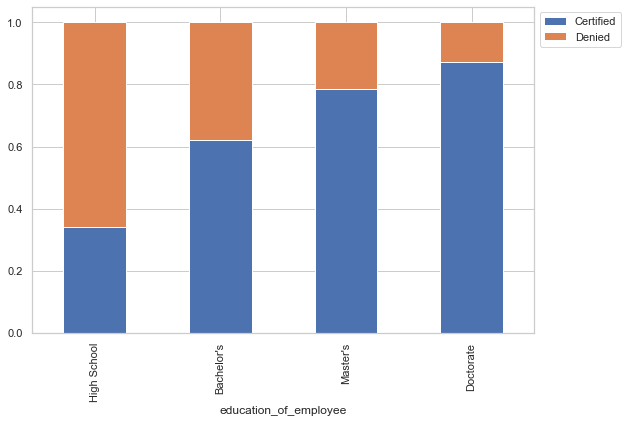

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


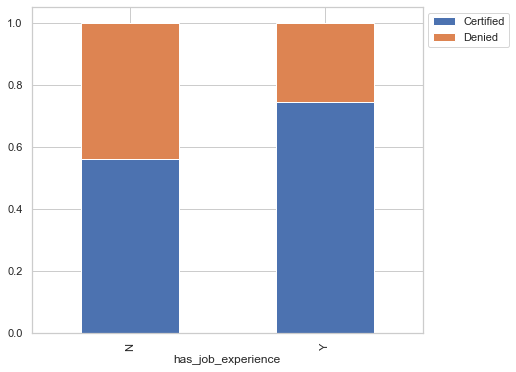

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


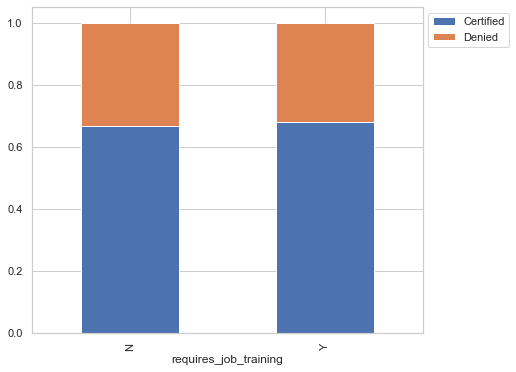

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


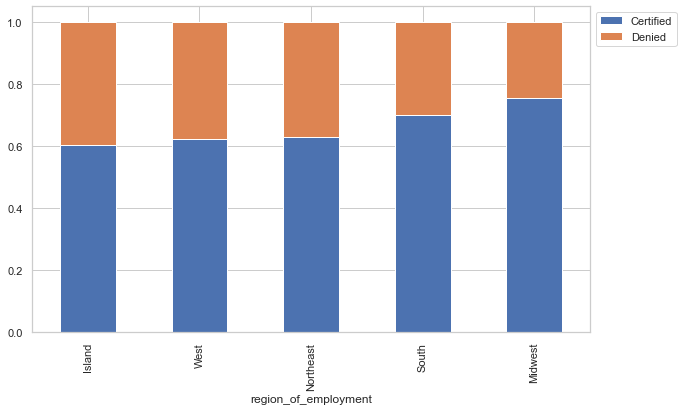

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


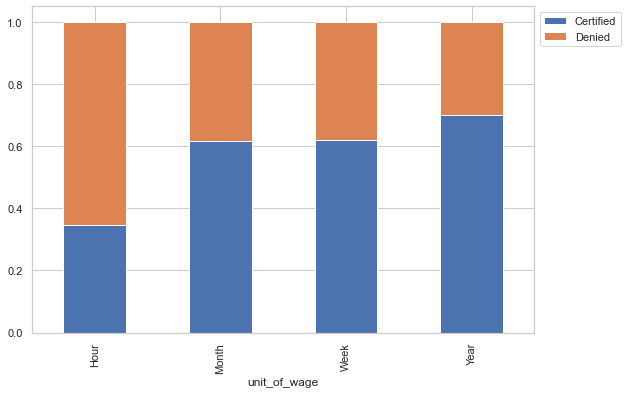

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


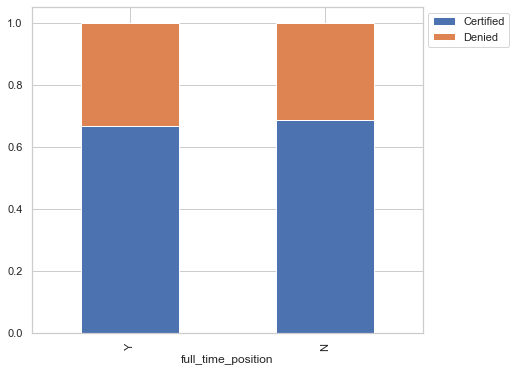

In [39]:
# Plotting barplots
columns = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position']
for col in columns:
    stacked_barplot(df, col, "case_status")

**Observations of EDA:**
- Most applications for a visa are from Asia ~67%.
- Around 40% of applications have a Bachelors Degree, and 38% with a Master's. Doctorate only covers ~9% of visa applications.
- 58% already have job experience and better yet, 88% do not require further job training.
- Northeast, South and West are the top three regions of intended region for employment.
- The predominant and top unit of wage is 'Year'.
- 90% are for full time positions and 67% of visa cases are certified.
- There is no correlation between any of the numerical columns.
- A visa certification is more likely to happen if you are from Europe or Africa, have a Master's or Doctorate qualification, and has job experience.

## Model Building

In [40]:
# Defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
    return df_perf

In [41]:
# Defining a function to plot the confusion matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging and boosting models

### Decision Tree

In [42]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

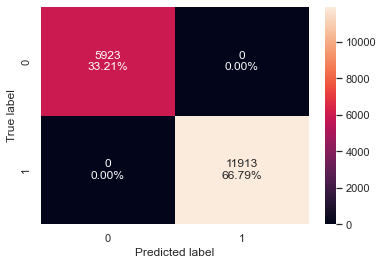

In [43]:
# Checking performance on training set
confusion_matrix_sklearn(dtree, X_train, y_train)

In [44]:
dtree_perf_train = model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       1.0     1.0        1.0 1.0


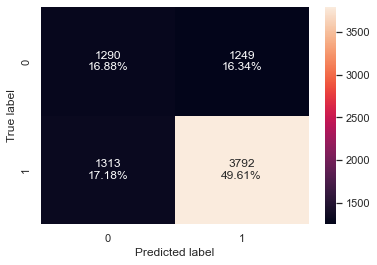

In [45]:
# Checking performance on testing set
confusion_matrix_sklearn(dtree, X_test, y_test)

In [46]:
dtree_perf_test = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.7        0.8 0.7


### Bagging

In [47]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

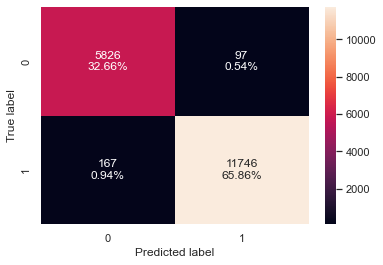

In [48]:
# Checking training set performance
confusion_matrix_sklearn(bagging, X_train, y_train)

In [49]:
bagging_perf_train = model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       1.0     1.0        1.0 1.0


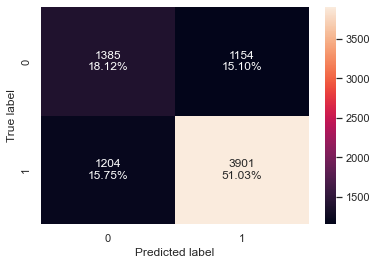

In [50]:
# Checking testing set performance
confusion_matrix_sklearn(bagging, X_test, y_test)

In [51]:
bagging_perf_test = model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.8        0.8 0.8


### Random Forest

In [52]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

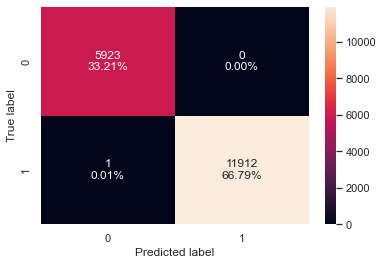

In [53]:
# Checking training set performance
confusion_matrix_sklearn(rf,X_train,y_train)

In [54]:
rf_perf_train = model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       1.0     1.0        1.0 1.0


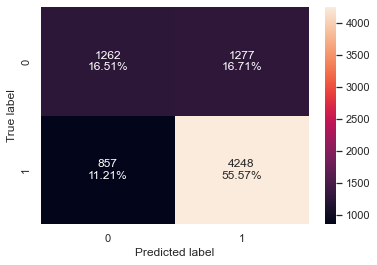

In [55]:
# Checking testing set performance
confusion_matrix_sklearn(rf,X_test,y_test)

In [56]:
rf_perf_test = model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.8        0.8 0.8


### Boosting

**AdaBoost**

In [57]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

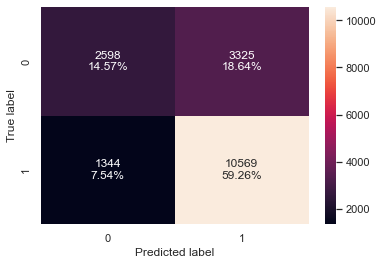

In [58]:
# Checking training set performance
confusion_matrix_sklearn(ab,X_train,y_train)

In [59]:
ab_perf_train = model_performance_classification_sklearn(ab,X_train,y_train)
print("Training performance \n",ab_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


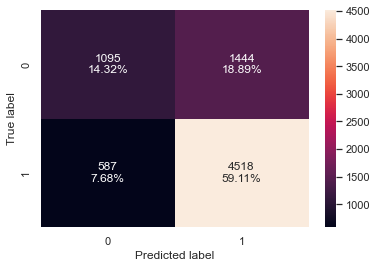

In [60]:
# Checking testing set performance
confusion_matrix_sklearn(ab,X_test,y_test)

In [61]:
ab_perf_test = model_performance_classification_sklearn(ab,X_test,y_test)
print("Testing performance \n",ab_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


**Gradient Boosting**

In [62]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

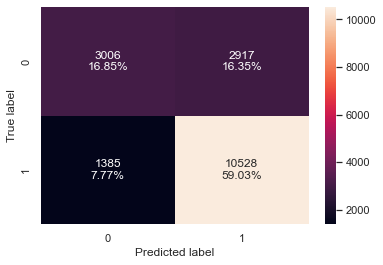

In [63]:
# Checking training set performance
confusion_matrix_sklearn(gb,X_train,y_train)

In [64]:
gb_perf_train = model_performance_classification_sklearn(gb,X_train,y_train)
print("Training performance \n",gb_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.8


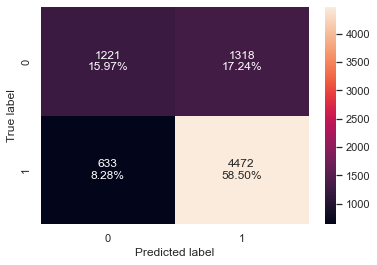

In [65]:
# Checking testing set performance
confusion_matrix_sklearn(gb,X_test,y_test)

In [66]:
gb_perf_test = model_performance_classification_sklearn(gb,X_test,y_test)
print("Testing performance \n",gb_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


**XGBoosting**

In [67]:
xg = XGBClassifier(random_state=1,eval_metric="logloss")
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

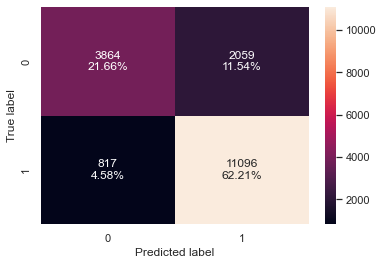

In [68]:
# Checking training set performance
confusion_matrix_sklearn(xg,X_train,y_train)

In [69]:
xg_perf_train = model_performance_classification_sklearn(xg,X_train,y_train)
print("Training performance \n",xg_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.9


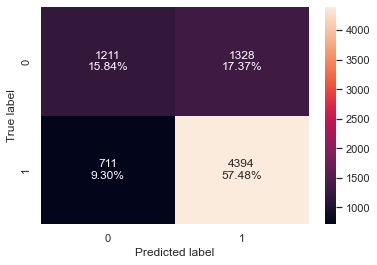

In [70]:
# Checking testing set performance
confusion_matrix_sklearn(xg,X_test,y_test)

In [71]:
xg_perf_test = model_performance_classification_sklearn(xg,X_test,y_test)
print("Testing performance \n",xg_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


##  Will tuning the hyperparameters improve the model performance?

### Decision Tree Tuning

In [72]:
# Choosing the type of classifier, hyperparameters, and F1 score
dtree_estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

# Fitting the best algorithm
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.001, random_state=1)

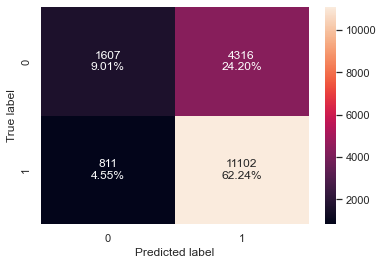

In [73]:
# Checking training set performance
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [74]:
dtree_tune_train = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance \n",dtree_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.7 0.8


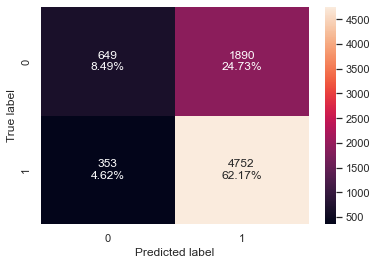

In [75]:
# Checking testing set performance
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [76]:
dtree_tune_test = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.7 0.8


### Bagging Tuning

In [77]:
# Choosing the type of classifier, hyperparameters, and F1 score
bagging_estimator = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [50, 75, 100, 110],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(bagging_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator = grid_obj.best_estimator_

# Fitting the best algorithm
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

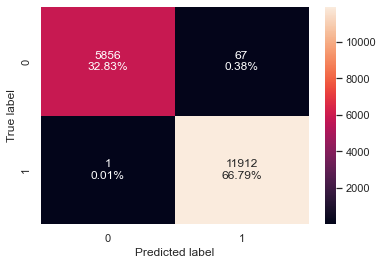

In [78]:
# Checking training set performance
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [79]:
bagging_tune_train = model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       1.0     1.0        1.0 1.0


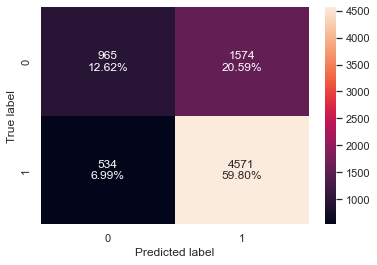

In [80]:
# Checking testing set performance
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [81]:
bagging_tune_test = model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.8        0.8 0.8


### Random Forest Tuning

In [82]:
# Choosing the type of classifier, hyperparameters, and F1 score
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {
    "max_depth": np.arange(5, 16, 5),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 7, 10],
    "n_estimators": [10, 20, 50, 100],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator = grid_obj.best_estimator_

# Fitting the best algorithm 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', oob_score=True,
                       random_state=1)

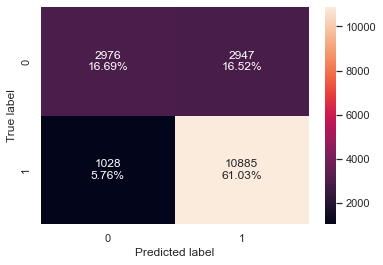

In [83]:
# Checking training set performance
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [84]:
rf_tune_train = model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.8


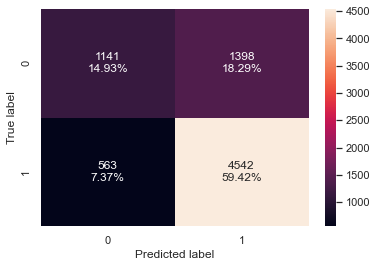

In [85]:
# Checking testing set performance
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [86]:
rf_tune_test = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


### AdaBoost Tuning

In [87]:
# Choosing the type of classifier, hyperparameters, and F1 score
ab_estimator = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": [50, 75, 100, 110],
    "learning_rate": [1, 0.1, 0.5, 0.01],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(ab_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

ab_estimator = grid_obj.best_estimator_

# Fitting the best algorithm 
ab_estimator.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

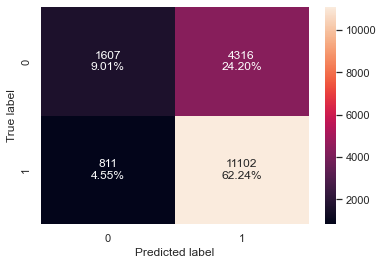

In [88]:
# Checking training set performance
confusion_matrix_sklearn(ab_estimator, X_train,y_train)

In [89]:
ab_tune_train = model_performance_classification_sklearn(ab_estimator, X_train,y_train)
print("Training performance \n",ab_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.7 0.8


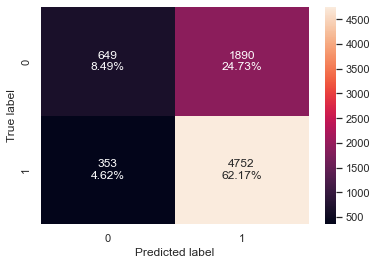

In [90]:
# Checking testing set performance
confusion_matrix_sklearn(ab_estimator, X_test,y_test)

In [91]:
ab_tune_test = model_performance_classification_sklearn(ab_estimator, X_test, y_test)
print("Testing performance \n",ab_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.7 0.8


### Gradient Boosting Tuning

In [92]:
# Choosing the type of classifier, hyperparameters, and F1 score
gb_estimator = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

parameters = {
    'n_estimators': [100,150,200],
    'subsample':[0.8,0.9,1],
    'max_features':[0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(gb_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gb_estimator = grid_obj.best_estimator_

# Fitting the best algorithm 
gb_estimator.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

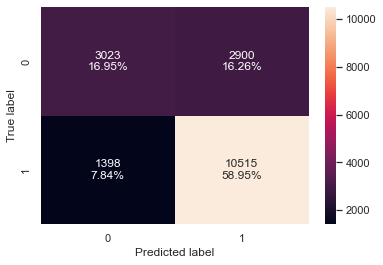

In [93]:
# Checking training set performance
confusion_matrix_sklearn(gb_estimator, X_train,y_train)

In [94]:
gb_tune_train = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
print("Training performance \n",gb_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.8


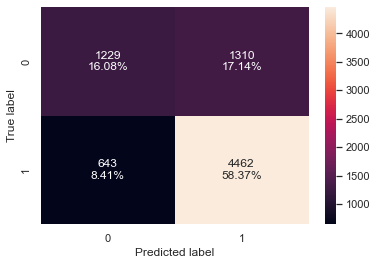

In [95]:
# Checking testing set performance
confusion_matrix_sklearn(gb_estimator, X_test,y_test)

In [96]:
gb_tune_test = model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


### XGBoost Tuning

In [97]:
# Choosing the type of classifier, hyperparameters, and F1 score
xg_estimator = XGBClassifier(random_state=1, eval_metric="logloss")

parameters = {
    "n_estimators": [100,150,200],
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(xg_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xg_estimator = grid_obj.best_estimator_

# Fitting the best algorithm 
xg_estimator.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

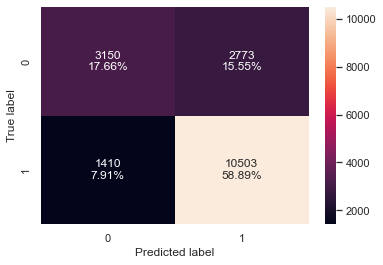

In [98]:
# Checking training set performance
confusion_matrix_sklearn(xg_estimator, X_train,y_train)

In [99]:
xg_tune_train = model_performance_classification_sklearn(xg_estimator, X_train,y_train)
print("Training performance \n",xg_tune_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.8


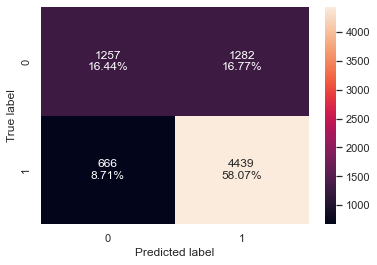

In [100]:
# Checking testing set performance
confusion_matrix_sklearn(xg_estimator, X_test,y_test)

In [101]:
xg_tune_test = model_performance_classification_sklearn(xg_estimator, X_test, y_test)
print("Testing performance \n",xg_tune_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


### Stacking

In [102]:
estimators = [
    ('Decision Tree', dtree_estimator),
    ("Random Forest", rf_estimator),
    ("AdaBoost", ab_estimator),
    ("Gradient Boosting", gb_estimator),
]

final_estimator = xg_estimator

In [103]:
stacking = StackingClassifier(estimators=estimators,final_estimator=final_estimator,cv=5)
stacking.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       oob_score=True,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(clas...
                                                 eval_metric='logloss

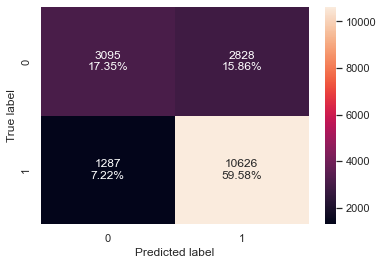

In [104]:
# Checking training set performance
confusion_matrix_sklearn(stacking, X_train,y_train)

In [105]:
stack_perf_train = model_performance_classification_sklearn(stacking, X_train,y_train)
print("Training performance \n",stack_perf_train)

Training performance 
    Accuracy  Recall  Precision  F1
0       0.8     0.9        0.8 0.8


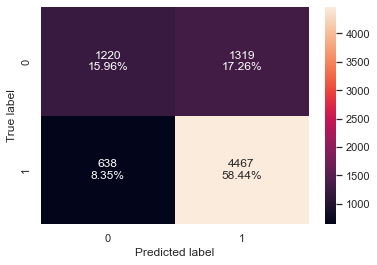

In [106]:
# Checking testing set performance
confusion_matrix_sklearn(stacking, X_test,y_test)

In [107]:
stack_perf_test = model_performance_classification_sklearn(stacking, X_test, y_test)
print("Testing performance \n",stack_perf_test)

Testing performance 
    Accuracy  Recall  Precision  F1
0       0.7     0.9        0.8 0.8


## Model Performance Comparison and Conclusions

In [108]:
# Training performance model comparison

models_train_comp_df = pd.concat(
    [
        dtree_perf_train.T,
        dtree_tune_train.T,
        bagging_perf_train.T,
        bagging_tune_train.T,
        rf_perf_train.T,
        rf_tune_train.T,
        ab_perf_train.T,
        ab_tune_train.T,
        gb_perf_train.T,
        gb_tune_train.T,
        xg_perf_train.T,
        xg_tune_train.T,
        stack_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.7,1.0,1.0,1.0,0.8,0.7,0.7,0.8,0.8,0.8,0.8,0.8
Recall,1.0,0.9,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Precision,1.0,0.7,1.0,1.0,1.0,0.8,0.8,0.7,0.8,0.8,0.8,0.8,0.8
F1,1.0,0.8,1.0,1.0,1.0,0.8,0.8,0.8,0.8,0.8,0.9,0.8,0.8


In [109]:
# Testing performance model comparison

models_test_comp_df = pd.concat(
    [
        dtree_perf_test.T,
        dtree_tune_test.T,
        bagging_perf_test.T,
        bagging_tune_test.T,
        rf_perf_test.T,
        rf_tune_test.T,
        ab_perf_test.T,
        ab_tune_test.T,
        gb_perf_test.T,
        gb_tune_test.T,
        xg_perf_test.T,
        xg_tune_test.T,
        stack_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
Recall,0.7,0.9,0.8,0.8,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Precision,0.8,0.7,0.8,0.8,0.8,0.8,0.8,0.7,0.8,0.8,0.8,0.8,0.8
F1,0.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


- XGBoost Classifer Model and the XGBoost Classifier Tuned Model both look to be giving the best results without overfitting the training data. I have chosen the XGBoost model that is not tuned as it gives a slighlty higher F1 score in the training set, which is the main metric I am choosing to go with for this project.

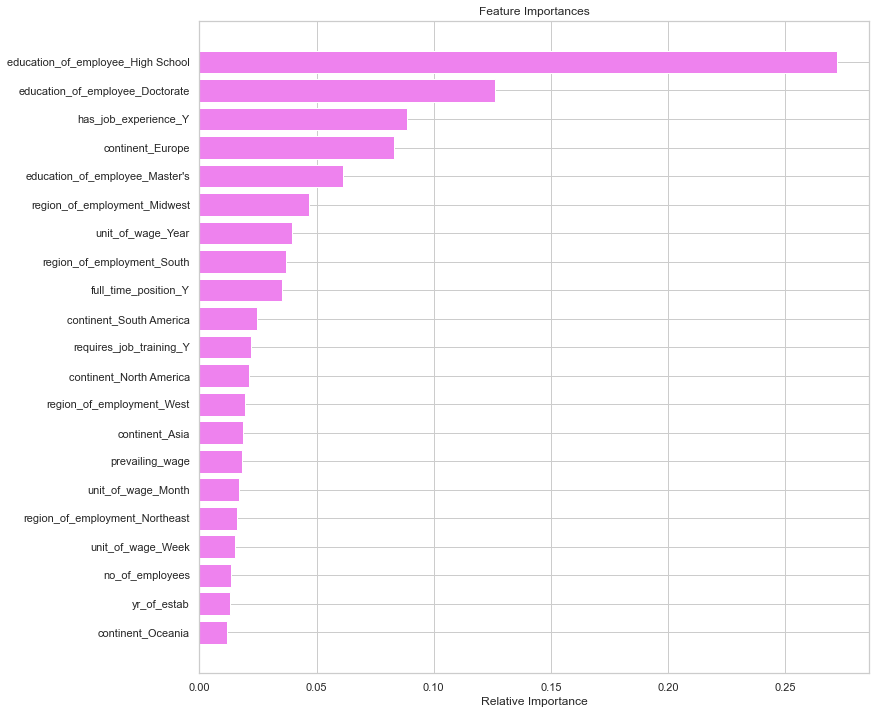

In [110]:
# Important features of final model i.e. XGBoost model
feature_names = X_train.columns
importances = xg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- education_of_employee (High School and Doctorate) are the most important features for the XGBoost model. Followed by has_job_experience.

## Actionable Insights and Recommendations

**EDA Insights:**
- The majority of applications for a visa are from Asia ~67%.
- Around 40% of applications have a Bachelors Degree, and 38% with a Master's. Doctorate only covers ~9% of visa applications.
- 58% already have job experience and better yet, 88% do not require further job training.
- Northeast, South and West are the top three regions of entended region for employment.
- The predominant and top unit of wage is 'Year'.
- 90% are for full time positions and 67% of visa cases are certified.
- There is no correlation between any of the numerical columns.
- A visa certification is more likely to happen if you are from Europe or Africa, have a Master's or Doctorate qualification, and has job experience.

**Final Model Insights:**
- The XGBoost model built can be used to predict if a visa application should be certified or denied.
- The 3 top drivers that significantly influence the case status are education of the employee (high school level and doctorate level), and if they have job experience.

**Recommendations:**
- The ideal profile for visa certification is if the applicant is from Europe, has a Doctorate level of education, and has job experience that probably does not require further job training.
- I would recommend from looking at the EDA anaylsis and model insights, that other good visa applicants will have the following factors for a good profile:
   - Full time position over part time.
   - Come from Europe, Africa, or South America.
   - Have a higher chance of certificaiton if they have at least a Master's level of education.
   - Have previous job experience and do not require further training.
   - If the region of employment is in the Midwest or South regions.
   - Have an annual salary (yearly pay unit).
- Once the desired performance is achieved from the model, EasyVisa can use it to shortlist prime applicants for visa approval. This would help to reduce the time of going through all applications and increase the efficiency of the process.